In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (18.0, 10.0)

In [12]:
weather = pd.read_csv('../data/raw/weather.csv', parse_dates=[1])

In [87]:
weather.loc[weather['SiteId'] == 139, :].set_index('Timestamp')[['Temperature']].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [23]:
from collections import OrderedDict

weather['Weight'] = 1 / weather['Distance']
weather['Weighted_Temperature'] = weather['Temperature'] * weather['Weight']

groups = weather.groupby(['SiteId', 'Timestamp'])

dataset = pd.DataFrame(data=OrderedDict([
    ('DistanceMean', groups['Distance'].mean()),
    ('DistanceVariance', groups['Distance'].std().fillna(0)),
    ('NumStations', groups['Distance'].count()),
    ('TemperatureMean', groups['Weighted_Temperature'].sum() / groups['Weight'].sum()),
    ('TemperatureVariance', groups['Temperature'].std().fillna(0)),
    ('TemperatureMin', groups['Temperature'].min()),
    ('TemperatureMax', groups['Temperature'].max()),
]))
dataset = dataset.reset_index()

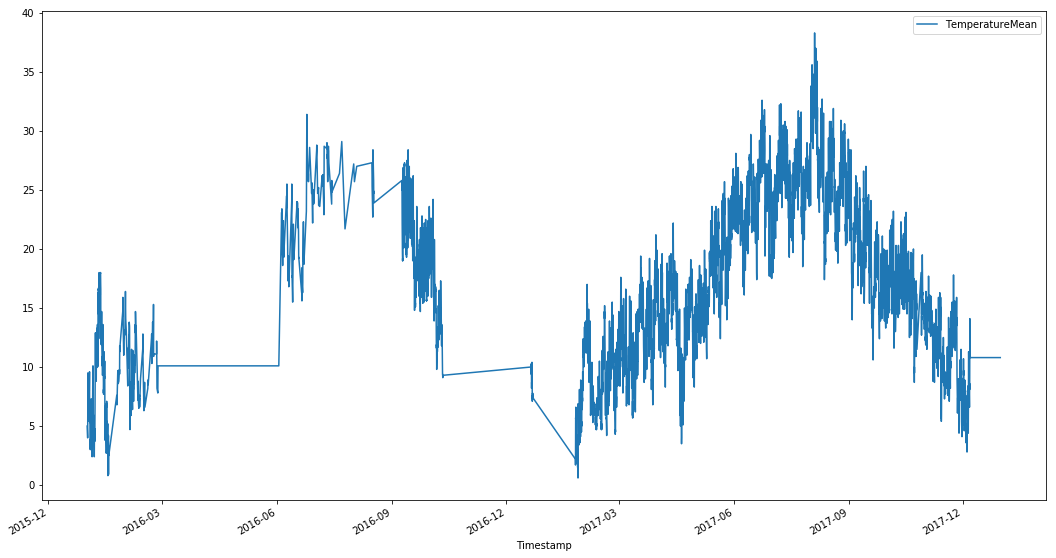

In [88]:
dataset.loc[dataset['SiteId'] == 245, :].set_index('Timestamp')[['TemperatureMean']].plot()

In [26]:
weather_proc = pd.read_csv('../data/processed/weather.csv', parse_dates=[1])

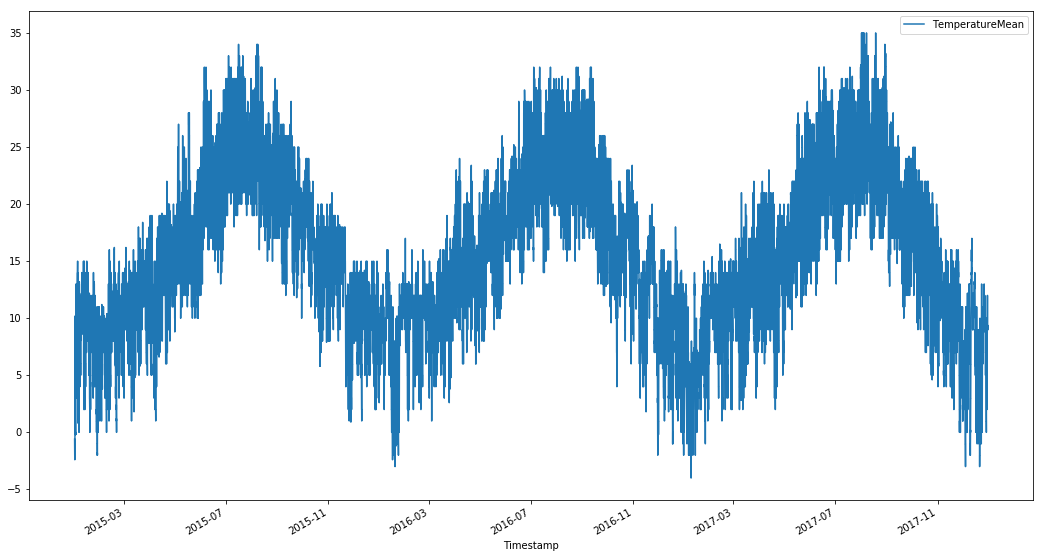

In [27]:
weather_proc.loc[weather_proc['SiteId'] == 127, :].set_index('Timestamp')[['TemperatureMean']].plot()

In [92]:
site_weather = weather_proc.loc[weather_proc['SiteId'] == 127, :].set_index('Timestamp')
site_weather = site_weather.resample('h').agg({
    'DistanceMean': 'mean',
    'DistanceVariance': 'mean',
    'NumStations': 'mean',
    'TemperatureMean': 'mean',
    'TemperatureVariance': 'mean',
    'TemperatureMin': 'min',
    'TemperatureMax': 'max'
})
site_weather = site_weather.interpolate(method='linear')

site_weather['TemperatureMean'].rolling(window=24, min_periods=1, center=True).mean()

# site_weather.loc[np.datetime64('2015-11-29 02:30:00'), :]
# site_weather.index

Timestamp
2015-01-01 01:00:00   -0.061111
2015-01-01 02:00:00    0.543590
2015-01-01 03:00:00    1.147619
2015-01-01 04:00:00    1.737778
2015-01-01 05:00:00    2.237500
2015-01-01 06:00:00    2.547059
2015-01-01 07:00:00    2.738889
2015-01-01 08:00:00    2.882456
2015-01-01 09:00:00    2.913333
2015-01-01 10:00:00    2.917460
2015-01-01 11:00:00    2.881818
2015-01-01 12:00:00    2.800000
2015-01-01 13:00:00    2.725000
2015-01-01 14:00:00    2.811111
2015-01-01 15:00:00    2.915278
2015-01-01 16:00:00    2.977778
2015-01-01 17:00:00    3.036111
2015-01-01 18:00:00    3.119444
2015-01-01 19:00:00    3.202778
2015-01-01 20:00:00    3.288889
2015-01-01 21:00:00    3.372222
2015-01-01 22:00:00    3.476389
2015-01-01 23:00:00    3.501389
2015-01-02 00:00:00    3.480556
2015-01-02 01:00:00    3.543056
2015-01-02 02:00:00    3.631944
2015-01-02 03:00:00    3.736111
2015-01-02 04:00:00    3.819444
2015-01-02 05:00:00    3.919444
2015-01-02 06:00:00    4.023611
                         ...  

In [58]:
sdata = pd.read_csv('../data/interim/train_3600000000000.csv', parse_dates=[2])

In [70]:
sd = sdata.loc[sdata['SiteId'] == 207, :]

In [66]:
site_weather.reset_index()

,Timestamp,DistanceMean,DistanceVariance,NumStations,TemperatureMean,TemperatureVariance,TemperatureMin,TemperatureMax
0,2015-01-01 01:00:00,23.11052,0.0,1.0,-1.200000,0.0,-2.0,-0.6
1,2015-01-01 02:00:00,23.11052,0.0,1.0,-2.000000,0.0,-2.0,-2.0
2,2015-01-01 03:00:00,23.11052,0.0,1.0,-1.500000,0.0,-2.0,-1.0
3,2015-01-01 04:00:00,23.11052,0.0,1.0,-1.466667,0.0,-2.0,-1.0
4,2015-01-01 05:00:00,23.11052,0.0,1.0,-2.000000,0.0,-2.0,-2.0
5,2015-01-01 06:00:00,23.11052,0.0,1.0,-2.000000,0.0,-2.0,-2.0
6,2015-01-01 07:00:00,23.11052,0.0,1.0,-2.133333,0.0,-2.4,-2.0
7,2015-01-01 08:00:00,23.11052,0.0,1.0,-2.000000,0.0,-2.0,-2.0
8,2015-01-01 09:00:00,23.11052,0.0,1.0,-1.000000,0.0,-2.0,0.0
9,2015-01-01 10:00:00,23.11052,0.0,1.0,2.066667,0.0,0.2,4.0


In [61]:
sd.set_index('Timestamp').merge(site_weather, left_index=True, right_index=True)

,obs_id,SiteId,ForecastId,Value,Frequency,DistanceMean,DistanceVariance,NumStations,TemperatureMean,TemperatureVariance,TemperatureMin,TemperatureMax
Timestamp,,,,,,,,,,,,


In [62]:
sd['Timestamp']

412592   2015-11-29 02:30:00
412593   2015-11-29 03:30:00
412594   2015-11-29 04:30:00
412595   2015-11-29 05:30:00
412596   2015-11-29 06:30:00
412597   2015-11-29 07:30:00
412598   2015-11-29 08:30:00
412599   2015-11-29 09:30:00
412600   2015-11-29 10:30:00
412601   2015-11-29 11:30:00
412602   2015-11-29 12:30:00
412603   2015-11-29 13:30:00
412604   2015-11-29 14:30:00
412605   2015-11-29 15:30:00
412606   2015-11-29 16:30:00
412607   2015-11-29 17:30:00
412608   2015-11-29 18:30:00
412609   2015-11-29 19:30:00
412610   2015-11-29 20:30:00
412611   2015-11-29 21:30:00
412612   2015-11-29 22:30:00
412613   2015-11-29 23:30:00
412614   2015-11-30 00:30:00
412615   2015-11-30 01:30:00
412616   2015-11-30 02:30:00
412617   2015-11-30 03:30:00
412618   2015-11-30 04:30:00
412619   2015-11-30 05:30:00
412620   2015-11-30 06:30:00
412621   2015-11-30 07:30:00
                 ...        
424130   2017-06-19 20:30:00
424131   2017-06-19 21:30:00
424132   2017-06-19 22:30:00
424133   2017-

In [64]:
pd.merge_asof(sd, site_weather.reset_index(), left_on='Timestamp', right_on='Timestamp', tolerance=pd.Timedelta('2D'))

,obs_id,SiteId,Timestamp,ForecastId,Value,Frequency,DistanceMean,DistanceVariance,NumStations,TemperatureMean,TemperatureVariance,TemperatureMin,TemperatureMax
0,1541578,127,2015-11-29 02:30:00,2864,10306.974781,3.600000e+12,23.11052,0.0,1.0,2.000000,0.0,2.0,2.0
1,3772209,127,2015-11-29 03:30:00,2864,10179.864636,3.600000e+12,23.11052,0.0,1.0,2.500000,0.0,2.0,3.0
2,3410456,127,2015-11-29 04:30:00,2864,10205.655100,3.600000e+12,23.11052,0.0,1.0,3.333333,0.0,3.0,4.0
3,4584106,127,2015-11-29 05:30:00,2864,10306.974781,3.600000e+12,23.11052,0.0,1.0,4.500000,0.0,4.0,5.0
4,4890393,127,2015-11-29 06:30:00,2864,10146.705468,3.600000e+12,23.11052,0.0,1.0,5.000000,0.0,5.0,5.0
5,7448845,127,2015-11-29 07:30:00,2864,9384.044599,3.600000e+12,23.11052,0.0,1.0,5.000000,0.0,5.0,5.0
6,3743904,127,2015-11-29 08:30:00,2864,9273.514039,3.600000e+12,23.11052,0.0,1.0,5.500000,0.0,5.0,6.0
7,7739274,127,2015-11-29 09:30:00,2864,9207.195702,3.600000e+12,23.11052,0.0,1.0,6.000000,0.0,6.0,6.0
8,1799513,127,2015-11-29 10:30:00,2864,9500.101688,3.600000e+12,23.11052,0.0,1.0,7.133333,0.0,6.4,8.0
9,6569846,127,2015-11-29 11:30:00,2864,9570.104376,3.600000e+12,23.11052,0.0,1.0,9.500000,0.0,9.0,10.0
